<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project</h3>
    <h4 align="center">mohammad malekpour</h5>
</div>

<center><img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50% >


In this notebook, **Google Play Store** datas was analyzed with python. The data is available in the following source in [kaggle](https://www.kaggle.com/gauthamp10/google-playstore-apps) and [GitHub](https://github.com/gauthamp10/Google-Playstore-Dataset) collected by  Gautham Prakash in June 2021

# Introduction to data
This data contains Application data of more than 600K applications with the following 23 attributes.-
* App
* Category
* Rating
* Reviews
* Size
* Installs
* Type
* Genres
* Last Updated
* Current Ver
* Android Ver





*This is just my first analyzing project and in end of this project a Linear Regression fit to data.*

# **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load and Prepare Data

In [3]:
df = pd.read_csv('googleplaystore.csv')

# EDA (Use Pandas)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.shape

(10841, 13)

In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


## Number  of NaN cells in each Culomn

In [9]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Separate the number of free and non-free Apps into different categories

In [10]:
pd.crosstab(df.Type , df.Category , normalize=True)*100

Category,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Type,,,,,,,,,,,,,,,,,,,,,
0,0.009225,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Free,0.000000,0.571956,0.756458,0.48893,1.872694,4.114391,0.553506,3.321033,2.094096,1.402214,...,2.850554,2.887454,3.653137,2.380074,2.693727,3.321033,7.057196,2.269373,1.577491,0.682657
Paid,0.000000,0.027675,0.027675,0.00000,0.258303,0.129151,0.000000,0.249077,0.064576,0.036900,...,0.765683,0.202952,0.258303,0.018450,0.027675,0.221402,0.719557,0.110701,0.036900,0.073801


# **Clean Data**

## Removing Duplicates Datas in App column

In [11]:
df.App.drop_duplicates(inplace = True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Category column

In [13]:
df.Category.value_counts().sort_values()

1.9                       1
BEAUTY                   53
PARENTING                60
COMICS                   60
EVENTS                   64
ART_AND_DESIGN           65
WEATHER                  82
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
HOUSE_AND_HOME           88
FOOD_AND_DRINK          127
MAPS_AND_NAVIGATION     137
ENTERTAINMENT           149
EDUCATION               156
VIDEO_PLAYERS           175
BOOKS_AND_REFERENCE     231
DATING                  234
TRAVEL_AND_LOCAL        258
SHOPPING                260
NEWS_AND_MAGAZINES      283
SOCIAL                  295
PHOTOGRAPHY             335
HEALTH_AND_FITNESS      341
FINANCE                 366
LIFESTYLE               382
SPORTS                  384
COMMUNICATION           387
PERSONALIZATION         392
PRODUCTIVITY            424
BUSINESS                460
MEDICAL                 463
TOOLS                   843
GAME                   1144
FAMILY                 1972
Name: Category, dtype: int64

In [14]:
df.Category = df.Category.replace('1.9' , np.nan)    # convert 1.9 to nan 
df.Category = df.Category.str.replace('_' , ' ')


## Rating column

In [15]:
df.loc[df.Rating.isna(), 'Rating' ] =  df.loc[ ~df.Rating.isna() , 'Rating'].sample(n=df.Rating.isna().sum()).values 

##  Review column
There are two modes for values with the wrong format:
1. Convert to acceptable format
2. Convert to NAN

In [16]:
''' Convert to acceptable format '''
# df.Reviews = df.Reviews.apply(lambda x: re.sub("[^0-9.]", "",x))
# df.Reviews = df.Reviews.astype(float)


' Convert to acceptable format '

In [17]:
''' Convert to NAN '''
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')  # coerce: invalid parsing will be set as NaN

## Size column

In [18]:
df.loc[df.Size == 'Varies with device'].shape      # there are 1526 rows having  string "Varies with device"

(1695, 13)

### In this column, must first clear the data and then scale them 

In [19]:
df.Size = df.Size.apply(lambda x : str(x).replace('Varies with device' , '0'))

filter_k =  df.Size.apply(lambda x : 'k' in x)
df.Size[filter_k] = df.Size[filter_k].apply(lambda x : str(np.double(str(x).replace('k' , ''))/1000))

df.Size = df.Size.apply(lambda x : str(x).replace('M' , ''))
df.Size = pd.to_numeric(df.Size , errors="coerce")

## Installs column

In [20]:
df.Installs = df.Installs.apply(lambda x: re.sub("[+,]", "",x))
df.Installs = pd.to_numeric(df.Installs , errors="coerce" )

## Type column

In [21]:
df.Type.unique()


array(['Free', 'Paid', nan, '0'], dtype=object)

In [22]:
df.Type = df.Type.replace('0' , np.nan)    # convert 0 to nan 

## Price column

In [23]:
df.Price = df.Price.apply(lambda x : str(x).replace('$' , ''))
df.Price = pd.to_numeric(df.Price , errors="coerce" )

## Last Updated column

In [24]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors="coerce" )

## drop NaN rows

In [25]:
df.dropna(inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  float64       
 4   Size            10829 non-null  float64       
 5   Installs        10829 non-null  float64       
 6   Type            10829 non-null  object        
 7   Price           10829 non-null  float64       
 8   Content Rating  10829 non-null  object        
 9   Genres          10829 non-null  object        
 10  Last Updated    10829 non-null  datetime64[ns]
 11  Current Ver     10829 non-null  object        
 12  Android Ver     10829 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.2+ MB


In [27]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Data Correlations(Relationships)

In [28]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.061325,0.040090,0.046320,-0.013996
Reviews,0.061325,1.000000,0.065377,0.643112,-0.009674
Size,0.040090,0.065377,1.000000,-0.003572,-0.013493
Installs,0.046320,0.643112,-0.003572,1.000000,-0.011698
Price,-0.013996,-0.009674,-0.013493,-0.011698,1.000000


# Visualisation

## number of apps in each category

Text(0.5, 1.0, 'number of apps in each category')

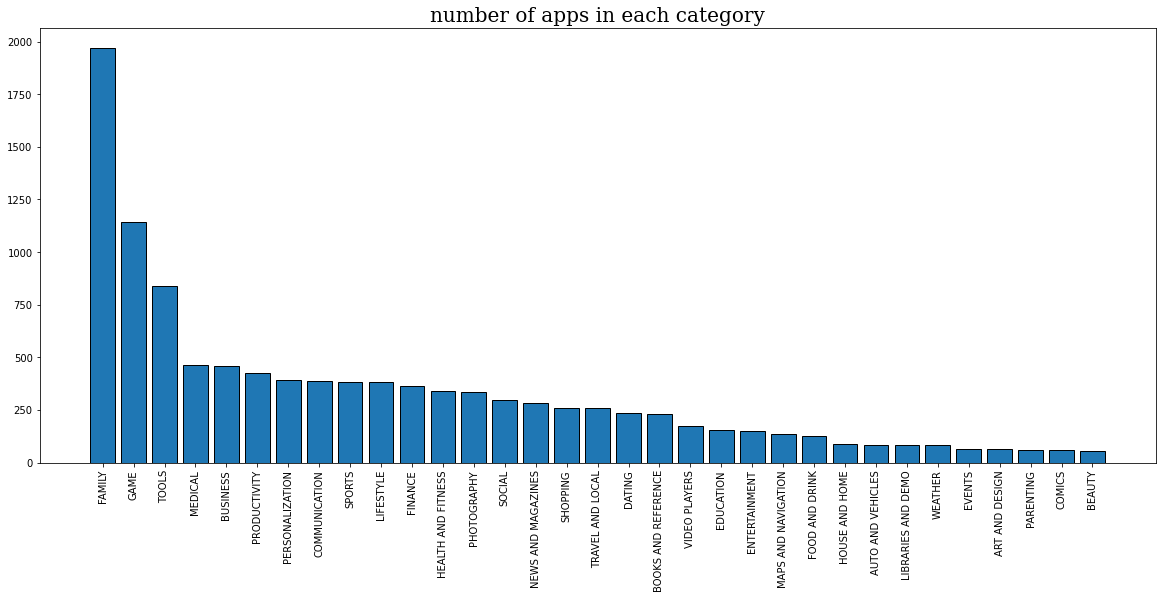

In [29]:
num_app_cat = df.Category.value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 8))
plt.bar(num_app_cat.index , num_app_cat.values , ec='k')
plt.xticks(rotation=90)
plt.title('number of apps in each category'    , fontdict={'family':'serif','color':'black','size':20}  , loc='center')

## Percentage Distribution of install app in each Category

In [30]:
dfp = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

category = list(dfp.Category)
installs = list(dfp.Installs)

fig= go.Figure(go.Treemap(
    
    labels =  category,
    parents=[""]*len(category),
    values =  installs,
    textinfo = "label+percent entry"
))
fig.update_layout(
    autosize=False,
    width= 1200,
    height=1000,)

fig.show()

# Linear Regression

<AxesSubplot:>

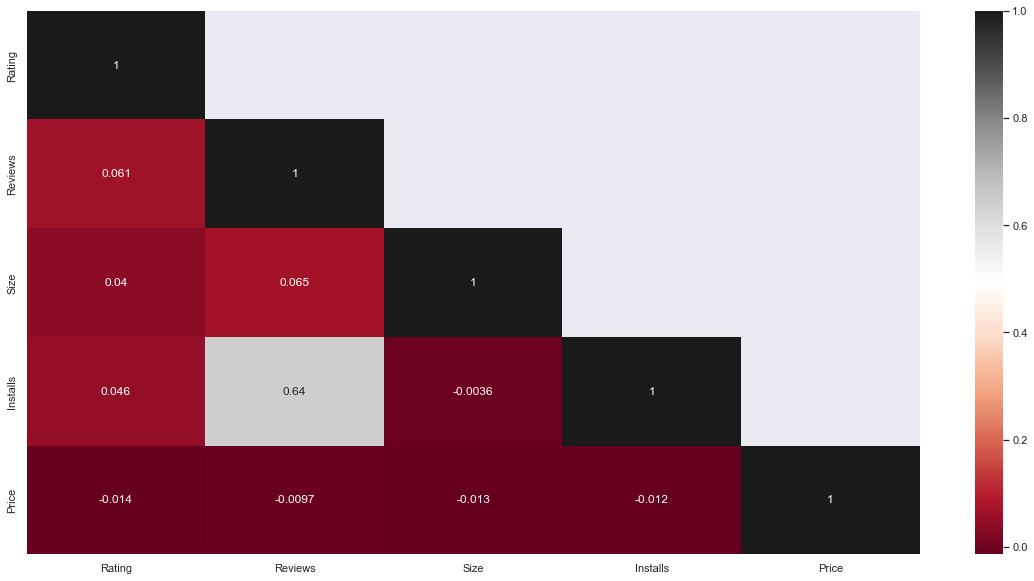

In [31]:
corr = df.corr()
# size
sns.set(rc={'figure.figsize':(20,10)})
# mask
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr,mask=mask, cmap="RdGy", annot=True)


In [32]:
Types = pd.get_dummies(df.Type)
df = pd.concat([df,Types],axis=1)

In [33]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Free', 'Paid'],
      dtype='object')

In [34]:
X = df.loc[: , ['Reviews' , 'Rating' , 'Free', 'Paid']]
X

,Reviews,Rating,Free,Paid
0,159.0,4.1,1,0
1,967.0,3.9,1,0
2,87510.0,4.7,1,0
3,215644.0,4.5,1,0
4,967.0,4.3,1,0
...,...,...,...,...
10836,38.0,4.5,1,0
10837,4.0,5.0,1,0
10838,3.0,4.5,1,0
10839,114.0,4.5,1,0


In [35]:
y = df.Installs
y

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10829, dtype: float64

In [36]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size=0.2)

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
predictions=regressor.predict(X_test)

In [40]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
r

0.5610742215029312

### The difference between the predicted value and the actual value separately at each point

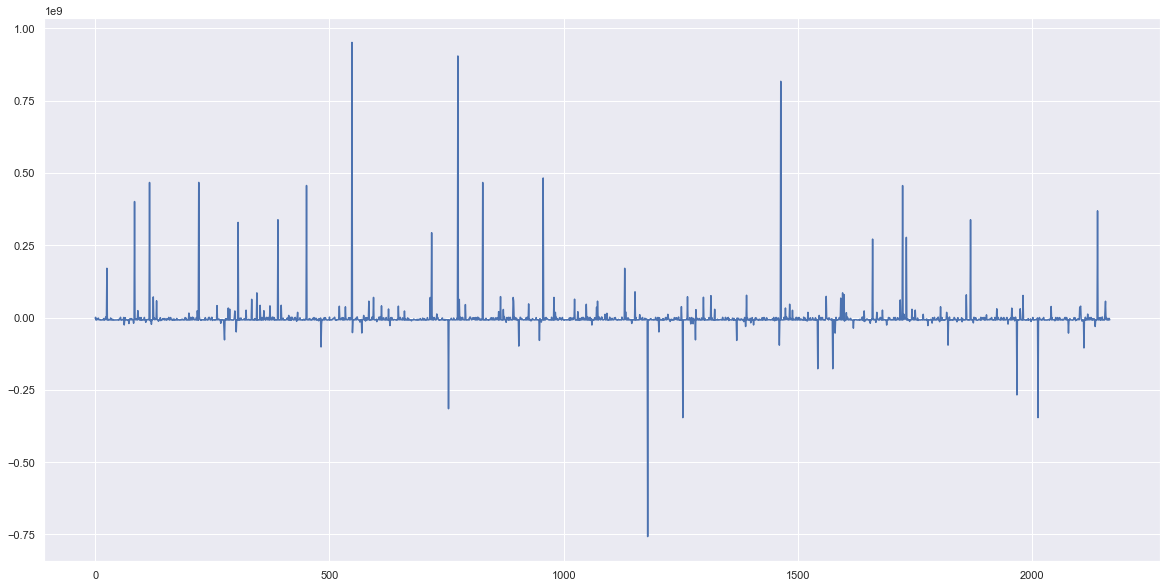

In [41]:
plt.plot(np.arange(len(y_test)) , y_test-predictions)

This example is only for training and practice  and the data is not appropriate for Linear Regression